In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Student_Marks.csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

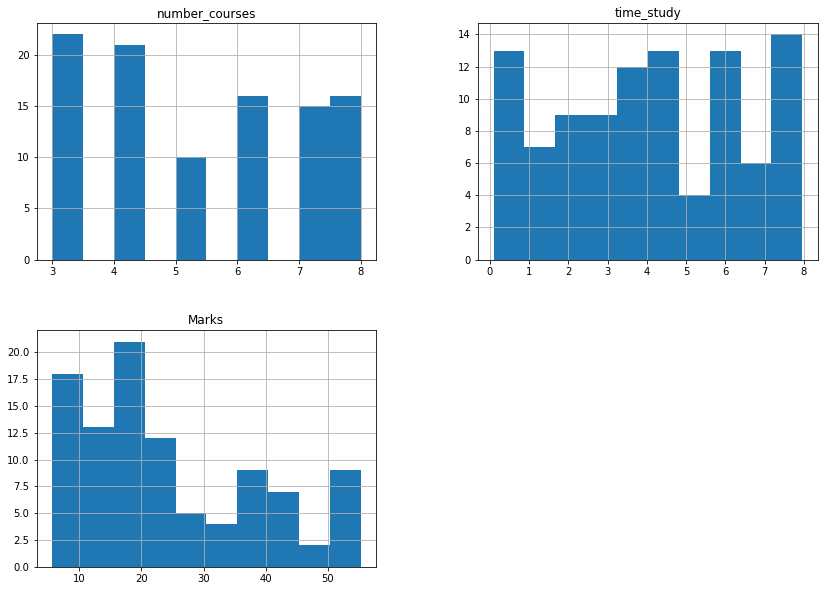

In [4]:
df.hist(bins = 10 , figsize= (14,10))
plt.show();

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


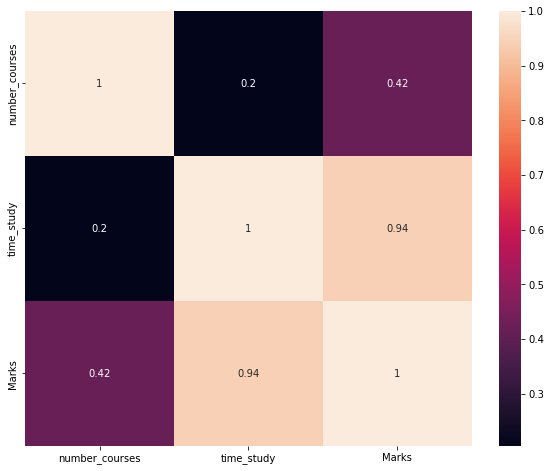

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

In [7]:
df["number_courses"].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

In [8]:
df["time_study"].value_counts()

4.508    1
4.869    1
1.629    1
4.633    1
2.518    1
        ..
3.864    1
1.299    1
0.156    1
4.378    1
6.335    1
Name: time_study, Length: 100, dtype: int64

In [9]:
df["Marks"].value_counts()

19.202    1
21.379    1
7.014     1
20.398    1
13.416    1
         ..
24.172    1
8.837     1
9.333     1
26.532    1
32.357    1
Name: Marks, Length: 100, dtype: int64

In [10]:
df["time_study"]=df["time_study"].astype(int)

In [11]:
df.drop("number_courses",axis=1)

,time_study,Marks
0,4,19.202
1,0,7.734
2,3,13.811
3,7,53.018
4,7,55.299
...,...,...
95,3,19.128
96,0,5.609
97,7,41.444
98,0,12.027


In [12]:
df.shape

(100, 3)

In [13]:
X = df.drop('Marks', axis = 'columns')
Y = df.drop('time_study', axis = 'columns')

print("Shape of X = : ", X.shape)
print("Shape of Y = : ", Y.shape)

Shape of X = :  (100, 2)
Shape of Y = :  (100, 2)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 51)

In [17]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of Y_test : ", X_test.shape)

Shape of X_train :  (80, 2)
Shape of X_test :  (20, 2)
Shape of Y_train :  (80, 2)
Shape of Y_test :  (20, 2)


In [18]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

In [23]:
model=lr.fit(X_train,Y_train)

In [24]:
tahmin=model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
(mean_squared_error(tahmin,Y_test))**0.5

3.1146267752846315

In [27]:
r2_score(tahmin,Y_test)

0.95416103888548

In [28]:
from sklearn.linear_model import Ridge,Lasso

In [29]:
L=Lasso()
R=Ridge()

In [30]:
L.fit(X_train,Y_train)


Lasso()

In [31]:
tahmin2=L.predict(X_test)

In [32]:
(mean_squared_error(tahmin2,Y_test))**0.5

3.3343323794504465

In [33]:
r2_score(tahmin2,Y_test)

0.8405000396294269

In [35]:
R.fit(X_train,Y_train)

Ridge()

In [36]:
tahmin3=R.predict(X_test)

In [38]:
(mean_squared_error(tahmin3,Y_test))**0.5

3.120617284426008

In [39]:
r2_score(tahmin2,Y_test)

0.8405000396294269